In [2]:
import sys
import numpy as np
import pandas as pd
# PCA is a process of figuring out most important features or pricipal components that has the most impact on the target variable
data = pd.read_csv(r'C:\Users\Guo Beiting\Downloads\heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
pd.set_option('display.max_columns', None)
data = pd.concat([data, pd.get_dummies(data['Sex']), pd.get_dummies(data['ChestPainType']), 
           pd.get_dummies(data['RestingECG']), pd.get_dummies(data['ExerciseAngina']), pd.get_dummies(data['ST_Slope'])], axis=1).reindex(data.index)

data = data.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 
from sklearn.preprocessing import StandardScaler
data_mean = data.mean()
data_std = data.std()

# Split the training data and test data
Train, Test = split_train_test(data,0.2)

In [10]:
Train_y = Train['HeartDisease'].reset_index(drop=True)
Test_y = Test['HeartDisease'].reset_index(drop=True)

Train = Train.drop(['HeartDisease'], axis=1)
Test = Test.drop(['HeartDisease'], axis=1)
# remove label, standardize
Train = (Train-data_mean[np.arange(21)!=6])/data_std[np.arange(21)!=6]

Train = Train.fillna(0).reset_index(drop=True)

Test = (Test-data_mean[np.arange(21)!=6])/data_std[np.arange(21)!=6]
Test = Test.fillna(0).reset_index(drop=True)
Train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,0.687943,-0.831608,0.285237,1.812770,0.910853,0.480640,-0.515671,0.515671,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-1.213585,1.213585,-0.271300,-1.001635,1.150047
1,0.051853,-0.399506,0.157248,-0.551041,0.125318,-0.831979,-0.515671,0.515671,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,0.823108,-0.823108,-0.271300,0.997280,-0.868582
2,0.687943,1.382914,0.970894,-0.551041,0.950130,-0.831979,1.937107,-1.937107,0.921889,-0.481624,-0.532547,-0.229554,1.969454,-1.227418,-0.490182,0.823108,-0.823108,-0.271300,-1.001635,1.150047
3,2.384185,0.410685,-0.016452,-0.551041,-0.817325,0.199364,1.937107,-1.937107,-1.083547,-0.481624,1.875721,-0.229554,-0.507202,-1.227418,2.037836,0.823108,-0.823108,-0.271300,0.997280,-0.868582
4,1.324034,0.410685,-0.546693,-0.551041,-1.681414,0.105606,-0.515671,0.515671,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-1.213585,1.213585,-0.271300,0.997280,-0.868582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.581928,-0.129442,-0.665540,-0.551041,-0.463834,-0.831979,-0.515671,0.515671,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,0.823108,-0.823108,-0.271300,0.997280,-0.868582
731,-1.114314,-1.749824,-1.817444,1.812770,-0.581664,0.574398,-0.515671,0.515671,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,0.823108,-0.823108,3.681935,-1.001635,-0.868582
732,0.475913,0.410685,-0.181009,-0.551041,0.910853,-0.831979,-0.515671,0.515671,-1.083547,-0.481624,1.875721,-0.229554,-0.507202,0.813831,-0.490182,0.823108,-0.823108,-0.271300,-1.001635,1.150047
733,-1.008299,-0.669570,0.193816,-0.551041,1.303621,-0.831979,-0.515671,0.515671,-1.083547,2.074046,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,0.823108,-0.823108,-0.271300,-1.001635,1.150047


In [11]:
#Making Covariance Matrix
covariance_matrix = np.cov(Train)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print(covariance_matrix[0])
print(eigen_values[0], eigen_vectors[0])

[ 7.19928231e-01 -7.36465597e-02 -1.68265363e-01 -5.25194445e-01
  1.20027442e-01 -7.40637970e-02 -2.54620340e-01  3.45506422e-01
  3.11097123e-03 -1.91899067e-01 -5.86422242e-03 -8.68613968e-02
 -4.15236737e-02 -3.58996233e-01  2.25127902e-01  1.40105291e-01
  1.91586865e-01 -1.79185133e-03  6.01998130e-02 -2.32056254e-01
 -1.85299367e-01 -9.62791692e-02 -2.33588641e-01  1.40450802e-01
  3.14335316e-01 -1.36619284e-01  3.69742067e-01 -4.22314797e-01
  2.71840878e-01  1.06439089e-01 -1.79070469e-01 -2.12571916e-01
 -2.88016496e-01 -2.18399035e-01  1.49513312e-01 -3.20654092e-02
  9.02438524e-02 -2.83906359e-01 -1.93106335e-01 -7.22248244e-02
  1.83639003e-01  2.77576262e-01 -7.35624527e-02 -3.36242623e-02
  4.48924241e-01  2.44793430e-01 -1.48231236e-01 -3.42656234e-01
 -8.12401040e-02  1.61717109e-01 -1.07316219e-01  2.21301213e-01
  1.67123028e-01 -3.17811959e-01 -1.89128493e-01  4.67109745e-01
 -1.97680301e-01  3.68859027e-01 -4.71685673e-02 -1.81078812e-01
  2.65876356e-01  9.82379

In [388]:
from sklearn.decomposition import PCA
#Principal axes in feature space, representing the directions of maximum variance in the data. 
# components axes that max the variance
# new axes to max the variance # unsupervised
components = 4
train_pca = PCA(n_components=components)
train_pca.fit(Train)
x_pca = train_pca.transform(Train)
transformed_data = Train @ train_pca.components_.T
transformed_data

,0,1,2,3
0,-1.379212,0.044172,-0.965167,1.587110
1,-0.684785,-1.777537,-0.729252,1.236263
2,1.317521,-1.041331,1.012651,1.437461
3,-2.847504,0.315995,-1.810613,-0.542022
4,2.614397,-1.181989,-0.098578,-1.283221
...,...,...,...,...
730,-3.263654,-0.305506,0.060774,-1.491997
731,-0.553529,-2.194643,-0.491993,1.447288
732,-1.596307,0.358416,1.156054,1.228503
733,-1.656334,-1.691711,-0.896213,-0.629707


In [389]:
import numpy as np
import scipy as sp
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

class MahalanobisBinaryClassifier():
    def __init__(self, xtrain, ytrain):
        self.xtrain_pos = xtrain.loc[ytrain == 1, :]
        self.xtrain_neg = xtrain.loc[ytrain == 0, :]

    def predict_proba(self, xtest):
        pos_neg_dists = [(p,n) for p, n in zip(mahalanobis(xtest, self.xtrain_pos), mahalanobis(xtest, self.xtrain_neg))]
        return np.array([(1-n/(p+n), 1-p/(p+n)) for p,n in pos_neg_dists])

    def predict(self, xtest):
        return np.array([np.argmax(row) for row in self.predict_proba(xtest)])

transformed_test = Test @ train_pca.components_.T
#transformed_test = LDA.transform(Test)
clf = MahalanobisBinaryClassifier(transformed_data, Train_y)        
pred_probs = clf.predict_proba(transformed_test)
pred_class = clf.predict(transformed_test)

# Pred and Truth
pred_actuals = pd.DataFrame([(pred, act) for pred, act in zip(pred_class, Test_y)], columns=['pred', 'true'])
print(pred_actuals)#[:5]) 

     pred  true
0       1     1
1       0     0
2       0     0
3       1     0
4       1     1
..    ...   ...
178     0     0
179     1     1
180     1     1
181     0     0
182     0     0

[183 rows x 2 columns]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [390]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
truth = pred_actuals.loc[:, 'true']
pred = pred_actuals.loc[:, 'pred']
scores = np.array(pred_probs)[:, 1]
print('AUROC: ', roc_auc_score(truth, scores))
print('\nConfusion Matrix: \n', confusion_matrix(truth, pred))
print('\nAccuracy Score: ', accuracy_score(truth, pred))
print('\nClassification Report: \n', classification_report(truth, pred))

AUROC:  0.9085969572567013

Confusion Matrix: 
 [[70 12]
 [15 86]]

Accuracy Score:  0.8524590163934426

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        82
           1       0.88      0.85      0.86       101

    accuracy                           0.85       183
   macro avg       0.85      0.85      0.85       183
weighted avg       0.85      0.85      0.85       183



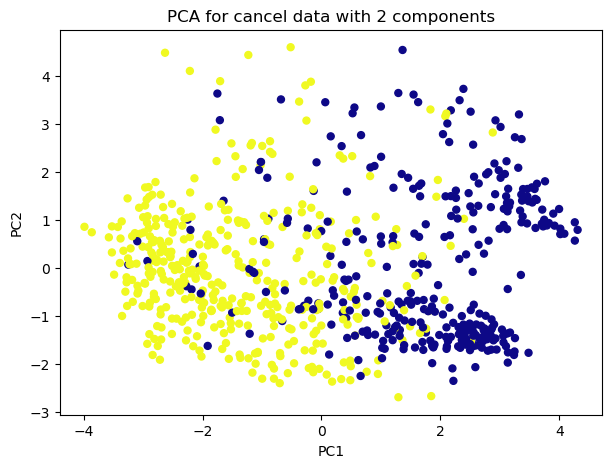

In [391]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7, 5])

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=Train_y, s=25, cmap='plasma')
plt.title('PCA for cancel data with 2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig("PCA.png")

In [392]:
df_comp = pd.DataFrame(train_pca.components_,columns=list(Train.columns.values))

<AxesSubplot: >

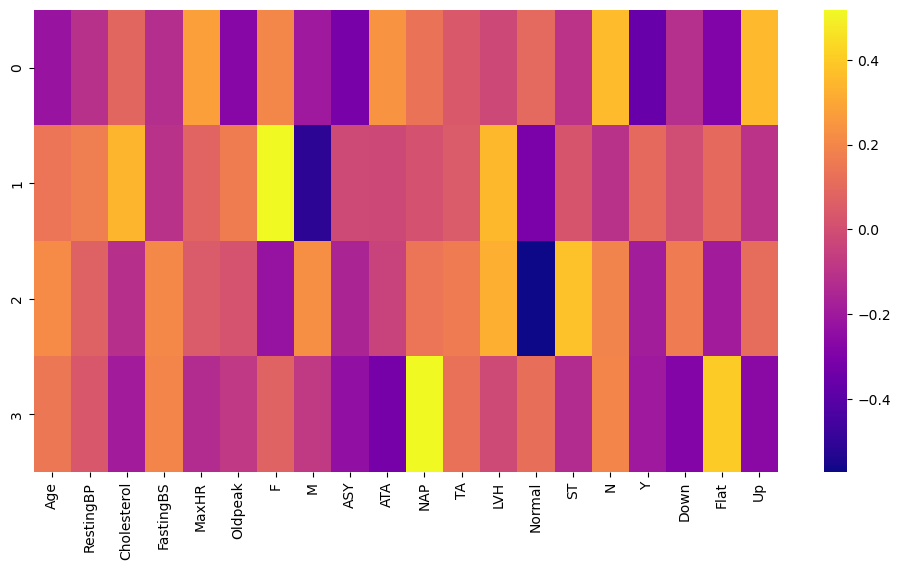

In [393]:
#This heatmap and the color bar basically represent the correlation between the various feature 
#and the principal component itself.
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

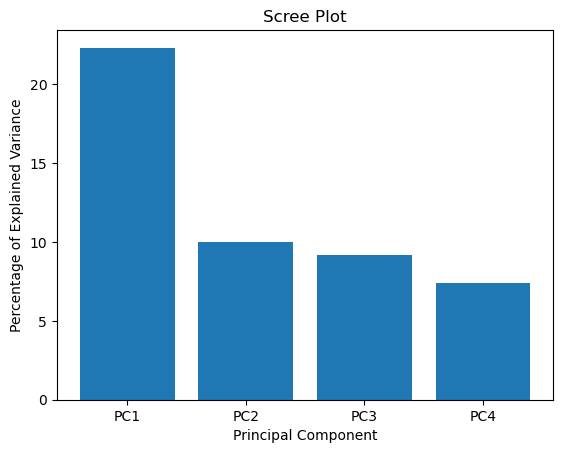

In [394]:
#The following code constructs the Scree plot
# 22.2% the variation is along the first PC, so a 2-D graph, using PC1-PC4 should do a good job representing the original data 
per_var = np.round(train_pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [395]:
#########################
#
# Determine which feature had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(train_pca.components_[0], index=Train.columns.values)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10 = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10])

Y         -0.360635
N          0.360635
Up         0.356180
ASY       -0.316315
Flat      -0.292303
MaxHR      0.276544
Oldpeak   -0.275561
ATA        0.241823
Age       -0.218923
M         -0.199326
dtype: float64
